## Пусть $x_n$ и $y_m$ $-$ независимые случайные выборки из нормального распределения с параметрами $a$, $\sigma_x^2 = 2$ и $b$, $\sigma_y^2 = 1$ соответственно. Используя реализации случайных выборок: $x = \{-1.11, -6.10, 2.42\}$, $y = \{-2.29, -2.91\}$, проверить гипотезу о равенстве средних против альтернатив $a > b$. Построить график мощности критерия.

### $H_0$ : a = b
### $H_1$: a > b


### Доверительный уровень Alpha = 0.05

Доверительный интервал: (-3.01333, 5.50667)


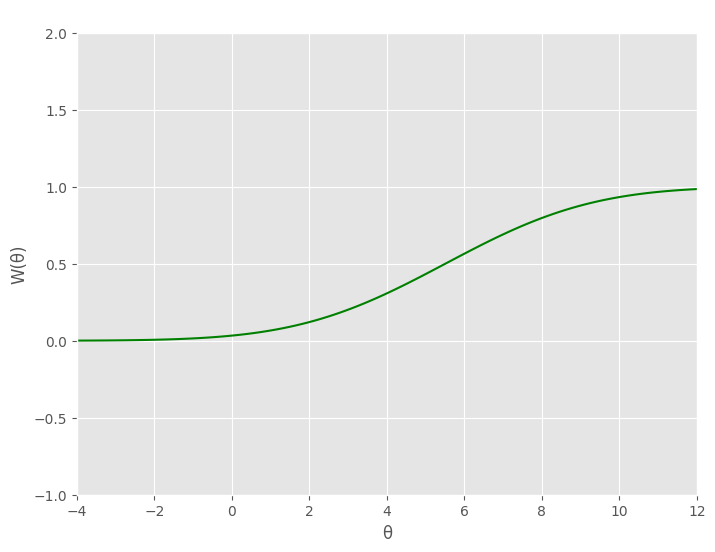

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

x_arr = np.array([-1.11, -6.1, 2.42])
y_arr = np.array([-2.29, -2.91])

alptha = 0.05
beta = 1 - alptha

sigma_x_sqr = 2
sigma_y_sqr = 1

iterations = 10000

h = 0
h_wave = np.mean(x_arr) - np.mean(y_arr)

delta = h_wave - h

bootstrap_delta = list()

for i in range(iterations):
    bootstrap_xsubarray = np.random.choice(x_arr, len(x_arr), replace = True)
    bootstrap_ysubarray = np.random.choice(y_arr, len(y_arr), replace = True)
    delta_star = np.mean(bootstrap_xsubarray) - np.mean(bootstrap_ysubarray) - h_wave
    bootstrap_delta.append(delta_star)


variety_row = np.sort(bootstrap_delta)

k1 = int(iterations * ((1 - beta)/2))
k2 = int(iterations * ((1 + beta)/2))

low_border = round(h_wave - variety_row[k2], 5)
high_border = round(h_wave - variety_row[k1], 5)

print(f"Доверительный интервал: ({low_border}, {high_border})")

def thetaFunc(theta):
  return 1 - norm.cdf(high_border, loc=theta, scale = 3)

theta_values = np.linspace(-4, 12, 100)

W_values = [thetaFunc(theta) for theta in theta_values]

plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(theta_values, W_values, color='r')
plt.xlabel("theta")
plt.ylabel("W(theta)")
plt.title("График W(theta)") 
plt.grid(True)
plt.xlim(-4, 12)
plt.ylim(-1, 2)
plt.show()